# Bike Share Market Strategy Case Study for Google Data Analytics Certification 
## (Details in the Readme file) <br> We will follow A-P-P-A-S-A Framework.

# 1. *__Ask__*
### ● What is the problem you are trying to solve?<br> ● How can your insights drive business decisions?<br><br> Key tasks
#### 1. Identify the business task<br>2. Consider key stakeholders
### Deliverable: <br> A clear statement of the business task

## Response To *__Ask__* 
### Identify trends using historical bike trip data to understand the difference between Casual vs. Annual members and the reason for annual subscriptions, to drive Marketing campaigns targeted to convert Casual members to Annual members.

# 2. *__Prepare__*
### ● Data preparation and elementary review on the dataset<br><br> Key tasks
#### 1. Download data and store it appropriately.<br>2. Identify how it’s organized.<br>3. Sort and filter the data.<br>4. Determine the credibility of the data.
### Deliverable: <br> A description of all data sources used.

In [91]:
import pandas as pd
import numpy as np

In [92]:
df_01 = pd.read_csv("202201-divvy-tripdata.csv")
df_01.info()
df_01.describe()
df_01.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103770 entries, 0 to 103769
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             103770 non-null  object 
 1   rideable_type       103770 non-null  object 
 2   started_at          103770 non-null  object 
 3   ended_at            103770 non-null  object 
 4   start_station_name  87510 non-null   object 
 5   start_station_id    87510 non-null   object 
 6   end_station_name    85843 non-null   object 
 7   end_station_id      85843 non-null   object 
 8   start_lat           103770 non-null  float64
 9   start_lng           103770 non-null  float64
 10  end_lat             103684 non-null  float64
 11  end_lng             103684 non-null  float64
 12  member_casual       103770 non-null  object 
dtypes: float64(4), object(9)
memory usage: 10.3+ MB


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member
5,A39C6F6CC0586C0B,classic_bike,2022-01-11 18:48:09,2022-01-11 18:51:31,Wood St & Chicago Ave,637,Honore St & Division St,TA1305000034,41.895634,-87.672069,41.903119,-87.673935,member
6,BDC4AB637EDF981B,classic_bike,2022-01-30 18:32:52,2022-01-30 18:49:26,Oakley Ave & Irving Park Rd,KA1504000158,Broadway & Sheridan Rd,13323,41.954341,-87.686080,41.952833,-87.649993,member
7,81751A3186E59A6B,classic_bike,2022-01-22 12:20:02,2022-01-22 12:32:06,Sheffield Ave & Fullerton Ave,TA1306000016,Damen Ave & Clybourn Ave,13271,41.925602,-87.653708,41.931931,-87.677856,member
8,154222B86A338ABD,electric_bike,2022-01-17 07:34:41,2022-01-17 08:00:08,Racine Ave & 15th St,13304,Clinton St & Washington Blvd,WL-012,41.861251,-87.656500,41.883380,-87.641170,member
9,72DC25B2DD467EEF,classic_bike,2022-01-28 15:27:53,2022-01-28 15:35:16,LaSalle St & Jackson Blvd,TA1309000004,Clinton St & Washington Blvd,WL-012,41.878166,-87.631929,41.883380,-87.641170,member


#### Comment: <br>Dataset for Jan 2022 seems to follow the Reliable, Original, Comprehensive, Current and Cited (ROCCC) requirement.
#### Will continue with a preliminary check on Feb and March dataset.

In [93]:
df_02 = pd.read_csv("202202-divvy-tripdata.csv")
df_03 = pd.read_csv("202203-divvy-tripdata.csv")
df_02.describe()
df_03.describe()

,start_lat,start_lng,end_lat,end_lng
count,284042.000000,284042.000000,283776.000000,283776.000000
mean,41.896696,-87.648145,41.896923,-87.648285
std,0.049271,0.032462,0.049377,0.032547
min,41.648501,-87.840000,41.640000,-87.840000
25%,41.879434,-87.663940,41.879472,-87.664020
50%,41.895649,-87.643302,41.895765,-87.643353
75%,41.925858,-87.628722,41.926277,-87.628722
max,42.070000,-87.520000,42.070000,-87.510000


#### Comment: <br> Feb and March dataset seem to be ROCCC as well.

## Response To *__Prepare__* 
### I will be analyzing the Jan 2022 - Dec 2022 Divvy Trip dataset for this study. The data used originates from the trip data available at (https://divvy-tripdata.s3.amazonaws.com/index.html) which is provided as a part of the case study.<br><br> The dataset contains details of bike-trips for the users of Cyclistic Bike Share service.<br><br> A preliminary study on the dataset reveals that it is indeed ROCCC and can be used for the analysis.

# 3. *__Process__*
### Key tasks
#### 1. Check the data for errors.<br>2. Choose your tools.<br>3. Transform the data so you can work with it effectively.<br>4. Document the cleaning process.
### Deliverable: <br> Documentation of any cleaning or manipulation of data.

## 3.1 Checking for errors.
#### We start by analyzing null values in the datasets.

In [94]:
#Combined all df for future use
df_04 = pd.read_csv("202204-divvy-tripdata.csv")
df_05 = pd.read_csv("202205-divvy-tripdata.csv")
df_06 = pd.read_csv("202206-divvy-tripdata.csv")
df_07 = pd.read_csv("202207-divvy-tripdata.csv")
df_08 = pd.read_csv("202208-divvy-tripdata.csv")
df_09 = pd.read_csv("202209-divvy-tripdata.csv")
df_10 = pd.read_csv("202210-divvy-tripdata.csv")
df_11 = pd.read_csv("202211-divvy-tripdata.csv")
df_12 = pd.read_csv("202212-divvy-tripdata.csv")
df = pd.concat([df_01, df_02, df_03,df_04, df_05, df_06,df_07, df_08, df_09,df_10, df_11, df_12])
df.reset_index(drop=True, inplace=True)

print("All values unique." if df.ride_id.nunique()==df.shape[0] else "All values not unique.")
print("Null count in Apr:",df.isnull().sum())

All values unique.
Null count in Apr: ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    833064
start_station_id      833064
end_station_name      892742
end_station_id        892742
start_lat                  0
start_lng                  0
end_lat                 5858
end_lng                 5858
member_casual              0
dtype: int64


#### Comment:<br>Apart from the primary key - ride_id, bike_type, start_time, end_time, member_type, and start location coordinates seem to be quite reliable, having 0 null values each.

## Preliminary conclusions drawn from this data (To be further explored and confirmed):
### 1. Every trip has completed as there is no null values in ended_at.<br> 2. All the ride_id values are unique and can be considered the primary key for the df. <br> 3. ride_id can be used to count number of rides based on different parameters.

## While the data might have quite a few null values, using the provided data we can answer the question asked with minimal data cleaning. (Data processing and cleaning followed hereafter)

## 3.2 Choose Your Tools - Python, Pandas, Numpy, Seaborn

## 3.3 Transform your data
### We start by converting few of the columns into a more readable format.

In [95]:
#Storing a copy incase any transformation goes haywire.
df_backup = df.copy()

In [96]:
# Converted to datetime
df['started_at'] = pd.to_datetime(df["started_at"])
df['ended_at'] = pd.to_datetime(df["ended_at"])

#Calculating ride length
df['ride_length'] = df['ended_at'] - df['started_at']

In [97]:
df['day_of_week'] = df['started_at'].dt.day_name()

In [98]:
columns_to_remove = ['start_lat', 'start_lng', 'end_lat', 'end_lng']
df.drop(columns=columns_to_remove, inplace=True)

## Conclusion:
### The following transformations were performed for our analysis:
### 1. Added new columns - ride_length and 'day_of_week' signifying the duration of the trip and the day of week based on the start time. <br> 2. Removed lat and lng values as they are not helpful in determining the distance travelled (the bike can be parked in the starting spot again). 

# 4. *__Analyze__*
### Key tasks
#### 1. Aggregate your data so it’s useful and accessible.<br>2. Organize and format your data.<br>3. Perform calculations.<br>4. Identify trends and relationships.
### Deliverable: <br> A summary of your analysis.

## Descriptive Analysis on the data

### 4.1 Boxplot to understand ride_length distribution

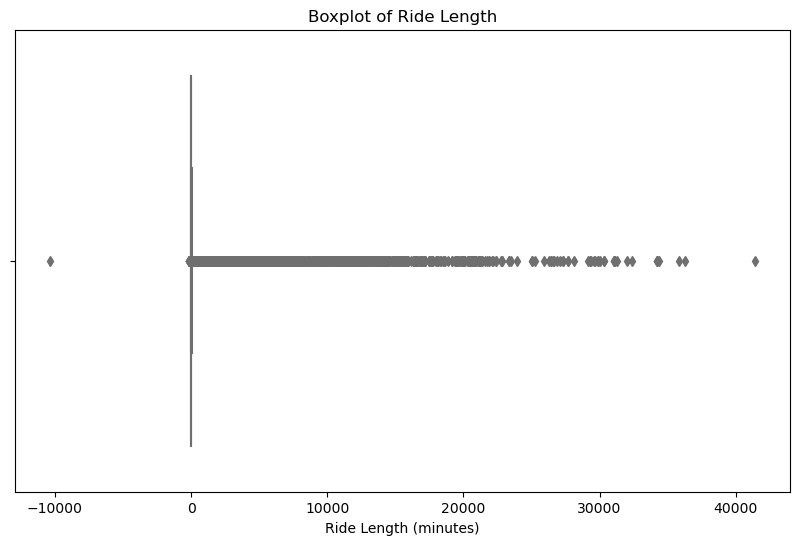

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

df['ride_length_seconds'] = df['ride_length'].dt.total_seconds()
df['ride_length_minutes'] = df['ride_length_seconds']/60
df.drop('ride_length_seconds', axis=1, inplace=True)

plt.figure(figsize=(10, 6))
sns.boxplot(x='ride_length_minutes', data=df, color='skyblue')
plt.xlabel('Ride Length (minutes)')
plt.title('Boxplot of Ride Length')

plt.show()

#### The boxplot gives us a rough idea that most of the rides are in the 0-5000 mins range while there are a few extreme outliers as well.

### 4.2 Mean, Max, Mode - Based on Type of Users 

In [100]:
mean_ride_length = df['ride_length'].dt.total_seconds().mean()/60
print("Mean Ride Length:", mean_ride_length, "minutes")

print("Max Ride Length (seconds):", df['ride_length'].max())

mode_day_of_week = df['day_of_week'].mode().iloc[0]
print("Mode of Day of Week:", mode_day_of_week)

Mean Ride Length: 19.443285744507005 minutes
Max Ride Length (seconds): 28 days 17:47:15
Mode of Day of Week: Saturday


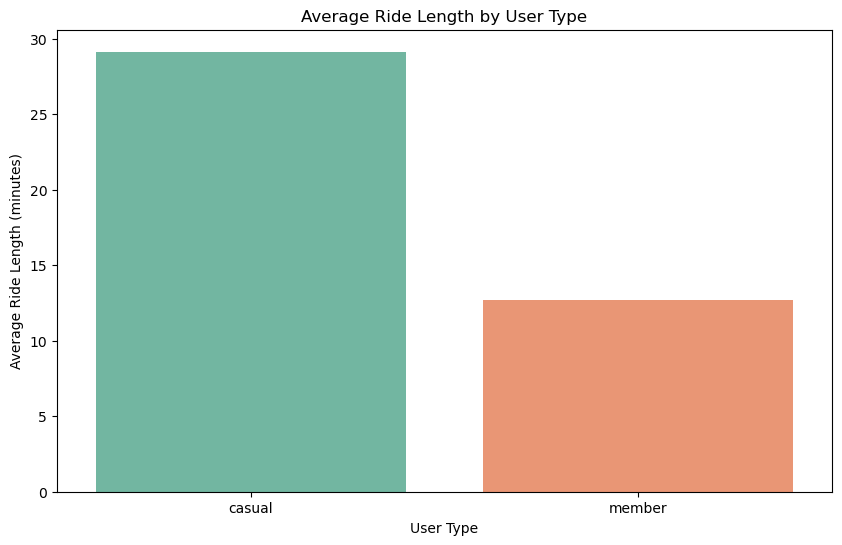

In [101]:
df['ride_length_seconds'] = df['ride_length'].dt.total_seconds()

average_ride_length_by_user = df.groupby('member_casual')['ride_length_seconds'].mean() / 60

# Barplot to visualize the average ride length by user type
plt.figure(figsize=(10, 6))
sns.barplot(x=average_ride_length_by_user.index, y=average_ride_length_by_user.values, palette='Set2')
plt.xlabel('User Type')
plt.ylabel('Average Ride Length (minutes)')
plt.title('Average Ride Length by User Type')
plt.show()

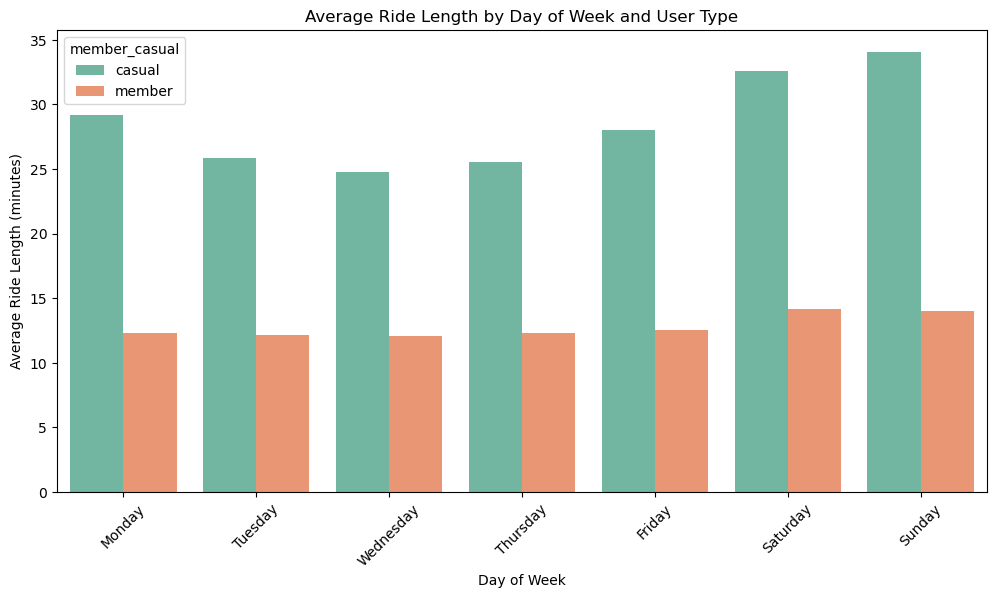

In [102]:
df['ride_length_seconds'] = df['ride_length'].dt.total_seconds()

day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
average_ride_length_by_day_and_user = df.groupby(['day_of_week', 'member_casual'])['ride_length_seconds'].mean() / 60 

# Barplot to visualize the average ride_length by day_of_week for each user type
plt.figure(figsize=(12, 6))
sns.barplot(x='day_of_week', y='ride_length_seconds', hue='member_casual', data=average_ride_length_by_day_and_user.reset_index(), palette='Set2', order=day_order)
plt.xlabel('Day of Week')
plt.ylabel('Average Ride Length (minutes)')
plt.title('Average Ride Length by Day of Week and User Type')
plt.xticks(rotation=45)
plt.show()

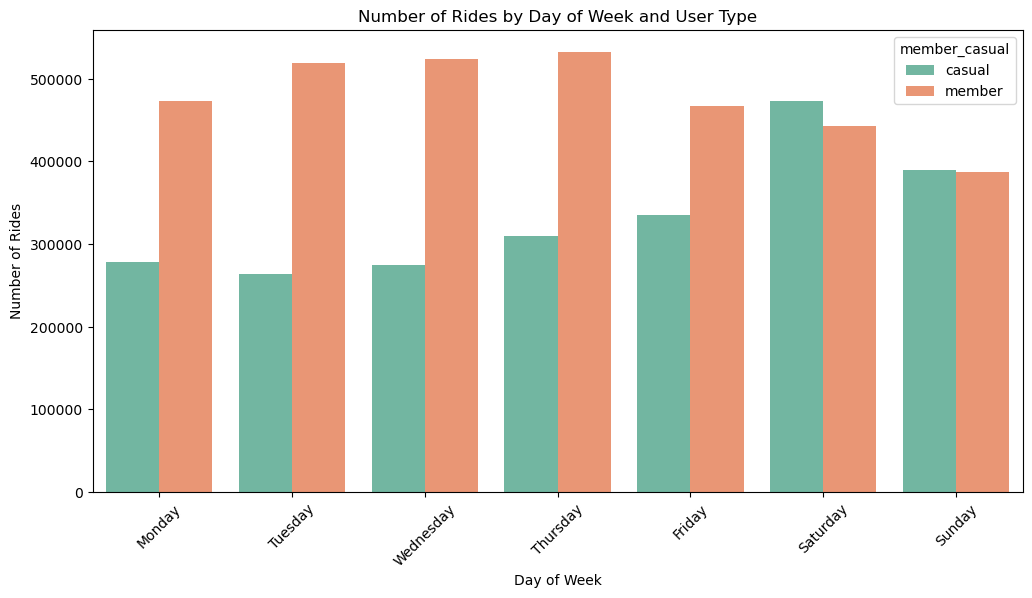

In [103]:
ride_count_by_day_and_user = df.groupby(['day_of_week', 'member_casual'])['ride_id'].count().reset_index()

# Barplot to visualize the number of rides by day_of_week for each user type
plt.figure(figsize=(12, 6))
sns.barplot(x='day_of_week', y='ride_id', hue='member_casual', data=ride_count_by_day_and_user, palette='Set2', order=day_order)
plt.xlabel('Day of Week')
plt.ylabel('Number of Rides')
plt.title('Number of Rides by Day of Week and User Type')
plt.xticks(rotation=45)
plt.show()

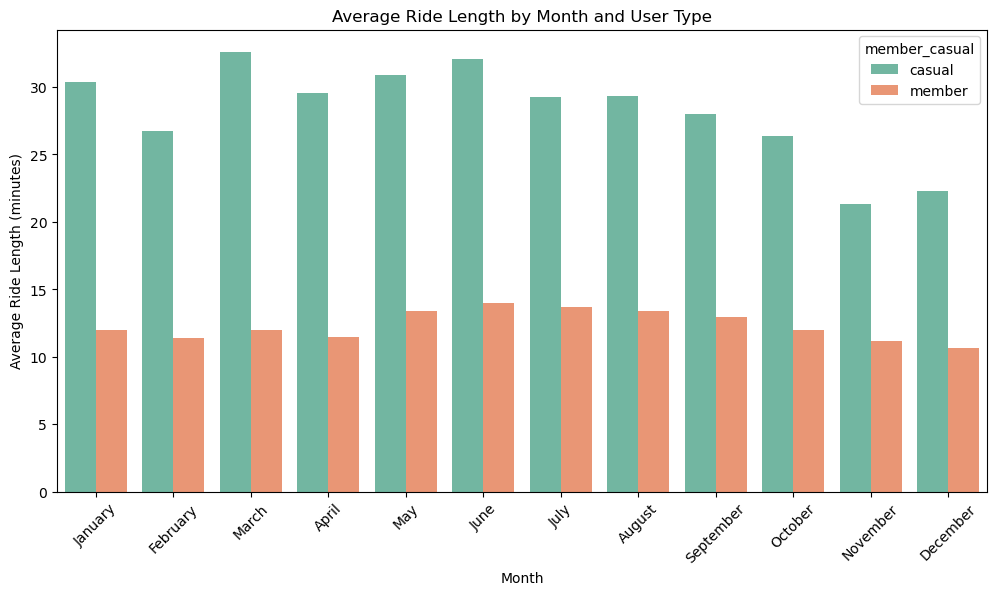

In [104]:
df['month'] = df['started_at'].dt.month_name()
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
average_ride_length_by_month_and_user = df.groupby(['month', 'member_casual'])['ride_length_seconds'].mean() / 60  # Convert to minutes

# Barplot to visualize the average ride_length by month for each user type
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='ride_length_seconds', hue='member_casual', data=average_ride_length_by_month_and_user.reset_index(), palette='Set2', order=month_order)
plt.xlabel('Month')
plt.ylabel('Average Ride Length (minutes)')
plt.title('Average Ride Length by Month and User Type')
plt.xticks(rotation=45)
plt.show()

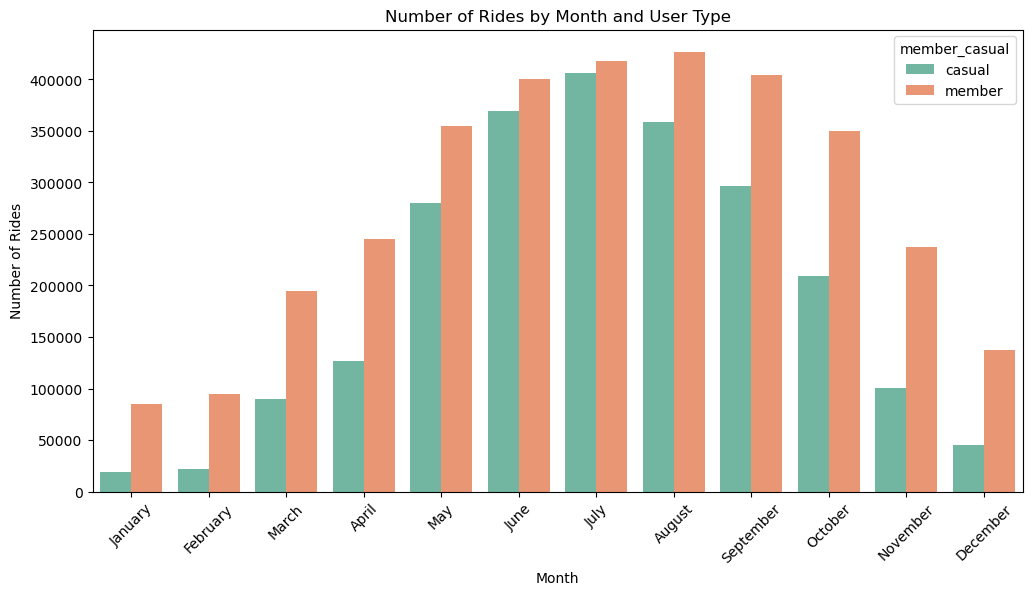

In [105]:
ride_count_by_month_and_user = df.groupby(['month', 'member_casual'])['ride_id'].count().reset_index()

# Barplot to visualize the number of rides by month for each user type
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='ride_id', hue='member_casual', data=ride_count_by_month_and_user, palette='Set2', order=month_order)
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.title('Number of Rides by Month and User Type')
plt.xticks(rotation=45)
plt.show()

## Observations:
### 1. Mean ride length for a casual user is about ~30 minutes, while for a member it is about half of that ~15 mins.<br> 2. The frequency at which a member uses the service is significantly higher than casual users on weekdays. However, casual users ride as frequently (or even more) on weekends.<br> 3. Seasons do affect the average length and frequency of rides as colder months - November to March, see a significant reduction in the number of rides. Hotter months on the other hand, see a spike in usage.

## Conclusions:
### 1. Initial observation suggests that Casual riders use the services for sporadic and often for a one-time use (Additional data could have confirmed this).<br>2. Members use the bikes on a more frequent basis and especially on weekdays which could suggest that they use the services for commute or daily travel needs.<br>3.Seasonality does play an important role. The company is based out of Chicago on the East coast which experiences severe cold weathers during Winters which could be the leading reason for the stark difference in usage during Winter months.<br>4. The number of casual users peak during Summer months which could indicate usage during vacations and holidays for possible getaways which is supported by the fact that some bikes were rented for more than 10+ days at times.